<div class="alert alert-block alert-warning">
    <h1><center> DAKD 2023 EXERCISE 1: DATA UNDERSTANDING  </center></h1>

This exercise relates to the _data understanding_ and  _data preparation_ stages of the Crisp Data Mining (CRISP-DM) model presented on the course. The questions at this stage of a data-analysis project are for example:

- Is the data quality sufficient?
- How can we check the data for problems?
- How do we have to clean the data?
- How is the data best transformed for modeling?


------------

### Imports:

In [1]:
# --- Libraries with a short description ---
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for plotting
import numpy as np #for numeric calculations and making simulated data.
import seaborn as sns # for plotting, an extension on matplotlib

# - sklearn has many data analysis utility functions like scaling as well as a large variety of modeling tools.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# This forces plots to be shown inline in the notebook
%matplotlib inline

### 1. Introduction to the dataset 

The dataset in this exercice contains comprehensive health information from  hospital patients with and without cardiovascular disease. The target variable "cardio," reflects the presence or absence of the disease, which is characterized by a buildup of fatty deposits inside the arteries (blood vessels) of the heart.

--------------
The exercise data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in days
| gender | binary | Male/Female
| body_mass | numeric | Measured weight of the patient (cm)
| height | numeric | Measured weight of the patient (kg)
| blood_pressure_high | numeric | Measured Systolic blood pressure
| blood_pressure_low | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| serum_lipid_level | categorical | Serum lipid / Cholesterol associated risk information evaluated by a doctor
|family_history| binary | Indicator for the presence of family history of cardiovascular disease based on medical records of patients
| cardio | binary | Whether or not the patient has been diagnosed with cardiac disease.

In [7]:
 # Read-in-data
data_path = "CardioCare_ex1.csv"
data = pd.read_csv(data_path, dtype = {'age': 'int', 'height': 'int', 'body_mass':'int', 'blood_pressure_low':'int', 'blood_pressure_high':'int', 'gender': 'boolean', 'smoke': 'boolean',
       'active':'boolean', 'cardio':'boolean', 'serum_lipid_level':'category', 'family_history':'boolean'})

---------
***Exercise 1 a)***
1. First, print out the first five rows of the data.

2. Then, save the feature names to lists by their types: make three lists named **numeric_features**, **binary_features** and **categorical_features**, containing the **names** of the features of each corresponding type (*you can think in terms of this exercise that binary variables can also be called booleans*).

In [8]:
# Head function lets you access a certain amount of rows
print(data.head(5))
    
numeric_features = ['age', 'height', 'body_mass', 'blood_pressure_low', 'blood_pressure_high']
binary_features = ['gender', 'smoke', 'active', 'cardio', 'family_history'] 
categorical_features = ['serum_lipid_level']

     age  gender  height  body_mass  blood_pressure_high  blood_pressure_low  \
0  19797   False     161         55                  102                  68   
1  22571    True     178         68                  120                  70   
2  16621    True     169         69                  120                  80   
3  16688   False     156         77                  120                  80   
4  19498    True     170         98                  130                  80   

   smoke  active  cardio serum_lipid_level  family_history  
0  False    True   False          elevated           False  
1  False   False   False            normal           False  
2  False    True   False            normal           False  
3  False    True   False            normal           False  
4   True    True    True          elevated           False  


" \nInitially the features were created by selecting dtypes (e.g., data.select_dtypes(include='int32'))\nbut this resulted in format issues so the simplest was to hardcode the features\n"

_________
## 2. Checking data quality
 In the following exercise we will look at the data descriptive statistics as well as how the behavior can change when the data types are different.


***2 a)***  Print out the data types of your dataset below.


In [9]:
print(data.dtypes)

age                       int32
gender                  boolean
height                    int32
body_mass                 int32
blood_pressure_high       int32
blood_pressure_low        int32
smoke                   boolean
active                  boolean
cardio                  boolean
serum_lipid_level      category
family_history          boolean
dtype: object


--------
***2 b)*** Use the **DataFrame.describe() method** in the cell below on your data.   


In [10]:
data.describe()

,age,height,body_mass,blood_pressure_high,blood_pressure_low
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,164.180952,73.895238,127.857143,81.814286
std,2429.010199,7.534648,14.612326,17.508947,9.947652
min,14367.000000,142.000000,45.000000,90.000000,50.000000
25%,17635.750000,158.000000,64.000000,120.000000,80.000000
50%,19778.000000,164.000000,70.000000,120.000000,80.000000
75%,21230.500000,170.000000,81.000000,140.000000,90.000000
max,23565.000000,195.000000,125.000000,190.000000,120.000000


--------
***2 c)*** Did you get all of the features statistics or not? What do you think happened?


The command only describes the features of the integer type values, as was expected. 
The boolean and string values are excluded, since they contain NaN values but if "include='all' is added inside describe(), it also shows the statistics of non-integer features 

----------
***2 d)*** Calculate descriptives for the binary (boolean) features and the categorical feature <br>



In [ ]:
# Join function for concatenation
bool_and_cat = data[binary_features].join(data[categorical_features])
bool_and_cat.describe()

,gender,smoke,active,cardio,family_history,serum_lipid_level
count,210,210,210,210,210,210
unique,2,2,2,2,2,3
top,False,False,True,False,False,normal
freq,129,186,162,105,128,153


----------
Now, we will see ***what would have happened if the data was read in using default settings*** and not giving information about the types of the features (dtypes), giving no arguments to pd.read_csv.

Run the below cell (no need to modify the code) and look at the output of the cell with the wrongly read data. Compare it with the output of the cell where you used the correctly read data to get the descriptives.

In [12]:
# Read in the dataset with no arguments
wrongly_read_data = pd.read_csv(data_path)

# Calculate descriptives for the data that was wrongly read in.
wrongly_read_data.describe()

,age,gender,height,body_mass,blood_pressure_high,blood_pressure_low,smoke,active,cardio,family_history
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,19455.504762,0.385714,164.180952,73.895238,127.857143,81.814286,0.114286,0.771429,0.500000,0.390476
std,2429.010199,0.487927,7.534648,14.612326,17.508947,9.947652,0.318918,0.420916,0.501195,0.489023
min,14367.000000,0.000000,142.000000,45.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,17635.750000,0.000000,158.000000,64.000000,120.000000,80.000000,0.000000,1.000000,0.000000,0.000000
50%,19778.000000,0.000000,164.000000,70.000000,120.000000,80.000000,0.000000,1.000000,0.500000,0.000000
75%,21230.500000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,1.000000,1.000000,1.000000
max,23565.000000,1.000000,195.000000,125.000000,190.000000,120.000000,1.000000,1.000000,1.000000,1.000000


***2 e)*** Looking at the above output, can you now say whats wrong with this presentation and why it was important to define the data types?

The presentation describes statistics on the assumption that the boolean values are integers, and therefore presenting illogical data. When data types are defined, logical mistakes can be avoided

-----------------------
## 3. Plotting numeric features
Descriptives don't really give a full or intuitive picture of the distribution of features. Next, we will make use of different plots to check the data quality.  

----------
***3 a)*** Plot the numeric features as histograms (see tutorial if you need help).


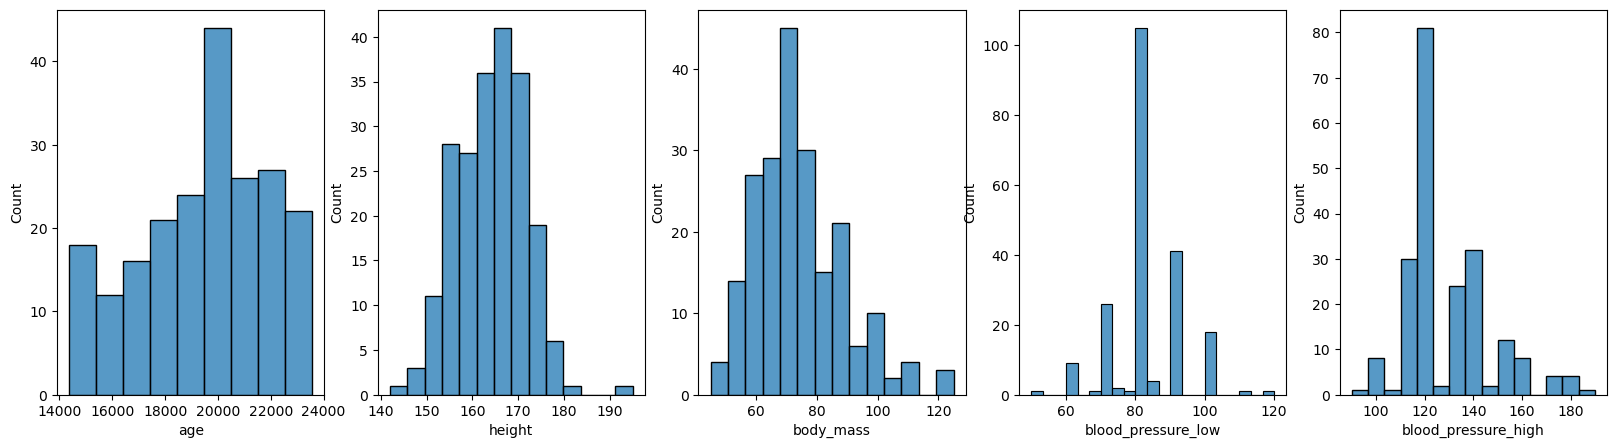

In [13]:
fig, axes = plt.subplots(1,5, figsize = (20,5))
numeric_titles = data[numeric_features].columns

# Using recursion to form the plots
for i, feature in enumerate(data[numeric_features]): 
    sns.histplot(data = data[numeric_features], x = feature, ax = axes[i])

_______
## 4. Plotting binary and categorical features

***4 a)*** Plot **barplots** for each of the non-numeric features. **Use fractions, not the real frequencies of the levels of these features**.

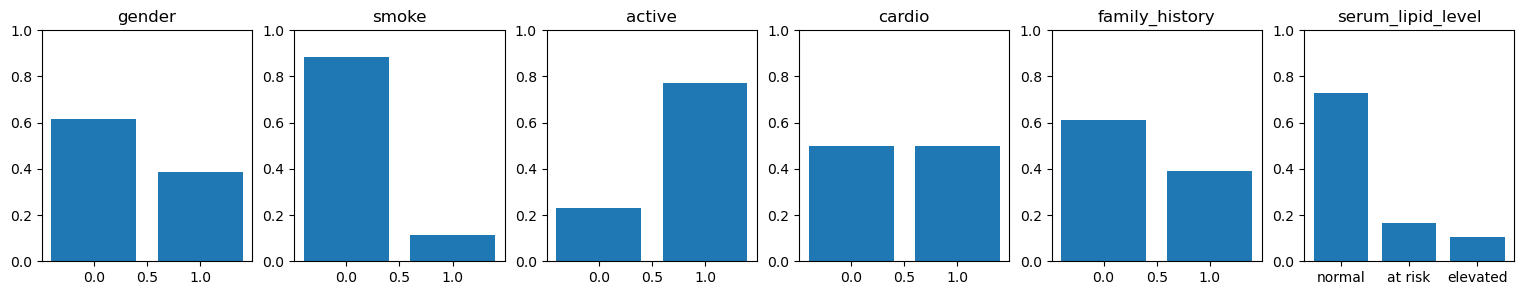

In [14]:
fig, axes = plt.subplots(1,6, figsize = (19,3))
numeric_titles = bool_and_cat.columns

# Using recursion again to form plots and "i" determines the axes
for i, feature in enumerate(bool_and_cat):
    axes[i].bar(x = bool_and_cat[feature].value_counts(normalize=True).index, height = bool_and_cat[feature].value_counts(normalize=True)) #values presented as fractions (sum up to 1)
    axes[i].set_title(numeric_titles[i])
    axes[i].set_ylim((0,1))

**4 b)** Do you see something odd with one of the features? Fix it.

There is a typo in the serum_lipid_level column ("elev ated" instead of "elevated"). This could be removed with the given function

In [32]:
# Shows the categories in serum_lipid_level class
print(data['serum_lipid_level'].unique())

# Fix typos
data['serum_lipid_level'] = data['serum_lipid_level'].replace('elev ated', 'elevated')
data['serum_lipid_level'] = data['serum_lipid_level'].cat.remove_categories('elev ated')

-------------

## 5. Feature generation and exploration

Feature Engineering is a crucial step in the process of preparing data for most data analysis projects. It involves creating new features or modifying existing ones to improve the performance of predictive models. Feature engineering is a combination of domain knowledge, creativity, and data analysis, and it can have a significant impact on the success of a data analysis project.

--------------



***5 a)*** Generate a new feature based off of the provided formula , using 'height' and 'body_mass' and name it **BMI**

\begin{align*}
\text{BMI} & = \frac{\text{Body mass (kg)}}{(\text{height (m)})^2} \\
\end{align*}



In [16]:
data["BMI"] = data['body_mass'] / (data['height']/100)**2

***5 b)*** Using the previously calculated feature **BMI** generate a new feature named **BMI_category** that categorizes the values into groups, according to the standard BMI categories :

- Underweight: BMI less than 18.5
- Normal Weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obese: BMI of 30 or greater

In [17]:
# With cut-function, we can set categories to value ranges. (BMI 100 is highest limit /impossible)
data["BMI_category"] = pd.cut(data["BMI"], bins = [0, 18.5, 25, 30, 100], labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

Now that we have our BMI values, it's a good practice to see if we can spot a hidden trend in our data.

***5 c)*** Create a countplot to visualize the distribution of cardio (target variable)  within different BMI categories.

<Axes: xlabel='BMI_category', ylabel='count'>

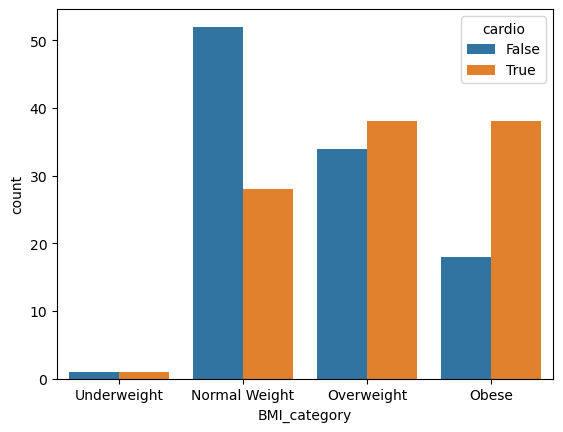

In [18]:
# Function "hue" allows us to compare cardio feature to the others
sns.countplot(x = data["BMI_category"], hue = data['cardio']) 

***5 d)*** Can you notice any relationship or visible trend?

It seems that the majority of normal weighted people in the data set doesn't do cardio exercise and the majority of obese does

In [19]:
# Add features to column type list
numeric_features.append("BMI")
data["BMI_category"] = data["BMI_category"].astype("category")
categorical_features.append("BMI_category")

-------------

## 6. Preprocessing numeric features

Scaling the data improves the performance of machine learning algorithms in many cases, or perhaps better put, can ruin performance if not done. For instance with distance based algorithms covered in the course such as PCA, T-SNE and KNN some features with large values can dominate the distance calculations.

We will look at two often used ways of bringing the values to the same scale: **min-max scaling to [0,1]** and **standardizing the features to 0 mean and unit variance**.
__________________________



**6 a)** Min-max numeric attributes to [0,1] and **store the results in a new dataframe called data_min_maxed**.

In [20]:
# Feature_range sets the values between 0-1
numeric_minmax = minmax_scale(data[numeric_features], feature_range=(0,1))

# Wrapped the min-max data around a new dataframe
data_min_maxed = pd.DataFrame(numeric_minmax, columns=numeric_features) 

**6 b)** Standardize numeric attributes to 0 mean and unit variance and **store the results in a new dataframe called data_standardized**

In [21]:
# With_mean=True and with_std=True sets 0 mean and unit variance
numeric_standardized = scale(data[numeric_features], with_mean=True, with_std=True)
data_standardized = pd.DataFrame(numeric_standardized, columns=numeric_features) 

**6 c)** Make two boxplots of the 'age' feature, one plot with the data_min_maxed and one with the data_standardized.

Text(0.5, 1.0, 'Standardized')

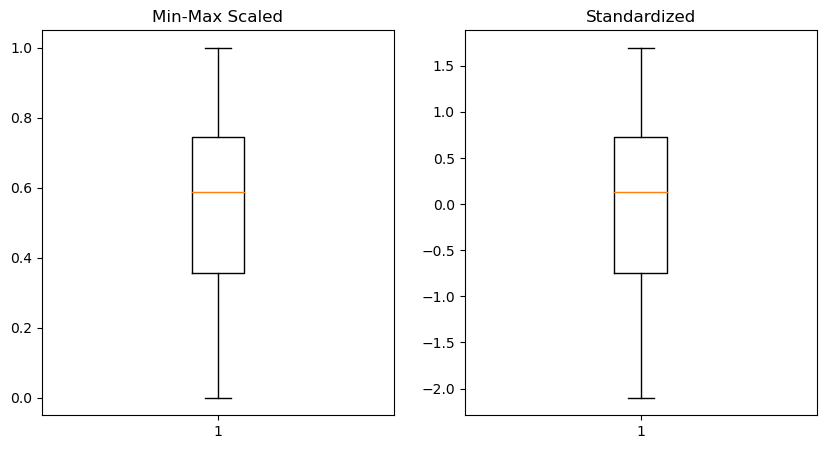

In [22]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
axes[0].boxplot(data_min_maxed["age"])
axes[1].boxplot(data_standardized["age"])
axes[0].set_title("Min-Max Scaled")
axes[1].set_title("Standardized")

**6 d)** Describe what you would expect to see in these two boxplots. How would the characteristics of the boxplots differ for min-max scaled data and standardized data?

As the range of values were set to [0,1], for min-max the plot would show data in a fixed range. For the standardized boxplot the unit variance and mean is set to 0 so it spreads more consistently and centers the median close to 0 for a more symmetric representation of the upper and lower quartile

---------

Lets see the differences of these preprocessing methods through an example. We will add an "outlier" point (some point with a large value) to replace the
last value in both data, then again minmax and standardize and plot. The code to add the value is given for you and you shouldn't change it.

--------------------

***6e) Do the following:***
1. Take the data for the age feature (age_w_outlier) provided for you
2. Make two variables, age_w_outlier_minmaxed, containing the min-maxed values of the age_w_outlier and
3.  age_w_outlier_standardized containing the standardized values for the age_w_outlier


In [23]:
# Add an outlier
data_w_outlier = data.copy()
data_w_outlier.loc[data.shape[0] -1 , 'age'] = 150
age_w_outlier = data_w_outlier.age

In [24]:
age_w_outlier_minmaxed = minmax_scale(age_w_outlier, feature_range=(0,1))
age_w_outlier_standardized = scale(age_w_outlier, with_mean=True, with_std=True)

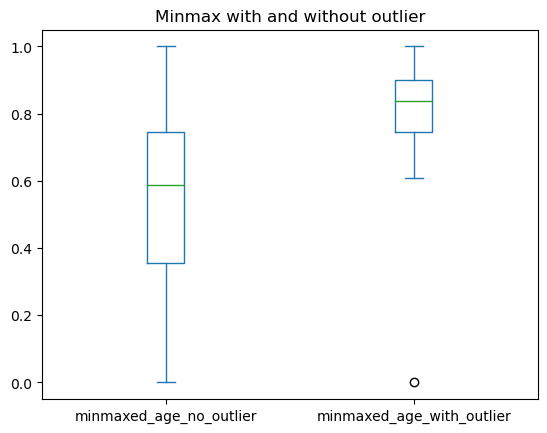

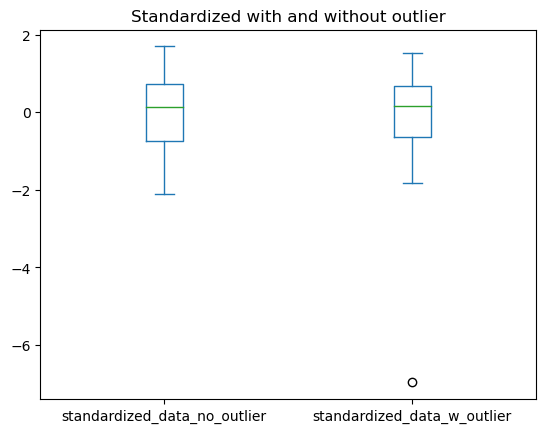

In [25]:
# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, min-maxed.
minmaxed_datas = pd.DataFrame({"minmaxed_age_no_outlier" : data_min_maxed.age,
              "minmaxed_age_with_outlier": age_w_outlier_minmaxed })

# Wrap in a dataframe that will have two features - the age feature without the outlier, and the age feature with it, standardized.
standardized_datas = pd.DataFrame({"standardized_data_no_outlier" : data_standardized.age,
              "standardized_data_w_outlier": age_w_outlier_standardized })

axes_minmaxed = minmaxed_datas[['minmaxed_age_no_outlier', 'minmaxed_age_with_outlier']].plot(kind='box', title='Minmax with and without outlier')
axes_std = standardized_datas[['standardized_data_no_outlier', 'standardized_data_w_outlier']].plot(kind='box', title='Standardized with and without outlier')

----------
**6 f) Look at the output of the above cell and answer the following**:

1. Can you notice a difference between the two cases (min-maxed and standardized)?
2. Can you say something about the difference of the effect of min-maxing and standardization?



    
1: The data point with a large value squeezes the plots to the upper limit since one value is very far from the average. The standardized plots whiskers also shorten because of this 

2: The min-maxing compresses the data to a specific rate (in our case to 0-1) and standardization centers the data around 0 while also adjusting the scale based on standard deviation 

---------------
## 7. Preprocessing categorical features



We can roughly divide categorical variables/features to two types:  ***nominal categorical***  and  ***ordinal categorical*** variables/features. Some cases are clear in terms of which of the two a feature falls into. For example nationality is not an ordered feature, but which grade in school someone is has a natural ordering. **One-hot encoding** was presented in the lectures and will be used in the following exercises with different learning methods.


-----
***Nominal categorical features need to be encoded***, because not encoding them implies that they have an order. For example, consider a dataset where you would have rows by different countries, encoded randomly with numbers, for ex. Finland = 1, Norway = 2 and so on. For some analyses and methods this would imply that Norway is somehow "greater" in value than Finland. For some algorithms, the implication would also be, that some of the countries would be "closer" to each other.

------
***Ordinal categorical features do not necessarily need to be encoded***, but there are cases where it can be wise. One case is that the categories are not even distance from each other, which is the case with the 'serum_lipid_level' feature with the levels 'normal', 'elevated' and 'at risk'. Its not clear that these are equal in distance from each other. When unsure, it may also be better to one-hot encode, and a lot of packages do it for you behind the scenes. Here we decide to one-hot encode.  

---------------------


***7 a)*** One-hot-encode the serum_lipid_level-feature and add the one-hot features to the data. Give the new features meaningful names. Print the first rows of the resulting dataframe.


In [26]:
one_hot_serum = pd.get_dummies(data['serum_lipid_level'], columns = ['serum_lipid_level'], prefix='serum_lipid_level') #get_dummies converts each categorical feature into boolean variables
print(one_hot_serum.head(5))

   serum_lipid_level_at risk  serum_lipid_level_elevated  \
0                      False                        True   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                        True   

   serum_lipid_level_normal  
0                     False  
1                      True  
2                      True  
3                      True  
4                     False  


----------

____________
##  8. Dimensionality reduction and plotting with PCA 
In the lectures, PCA was introduced as a dimensionality reduction technique. Here we will use it to reduce the dimensionality of the numeric features of this dataset and use the resulting compressed view of the dataset to plot it. This means you have to, run PCA  and then project the data you used to fit the PCA to the new space, where the principal components are the axes.
____________

-------------
**8 a)** Do PCA with two components with and without z-score standardization **for the numeric features in the data**.

In [27]:
pca = PCA(n_components=2)
pca_standardized = PCA(n_components=2)

# Fits the model the given data and applies dimensionality reduction
pca_without_stan = pca.fit_transform(data[numeric_features])

# We can use the earlierly defined data_transform set with 0 mean and unit variance
pca_with_stan = pca_standardized.fit_transform(data_standardized)

-------------


**8 b)** Plot the data, projected on to the PCA space as a scatterplot, the x-axis being one component and y the other. **Add the total explained variance to your plot as an annotation**. 

Text(0.05, 0.95, 'Total explained variance:0.61469')

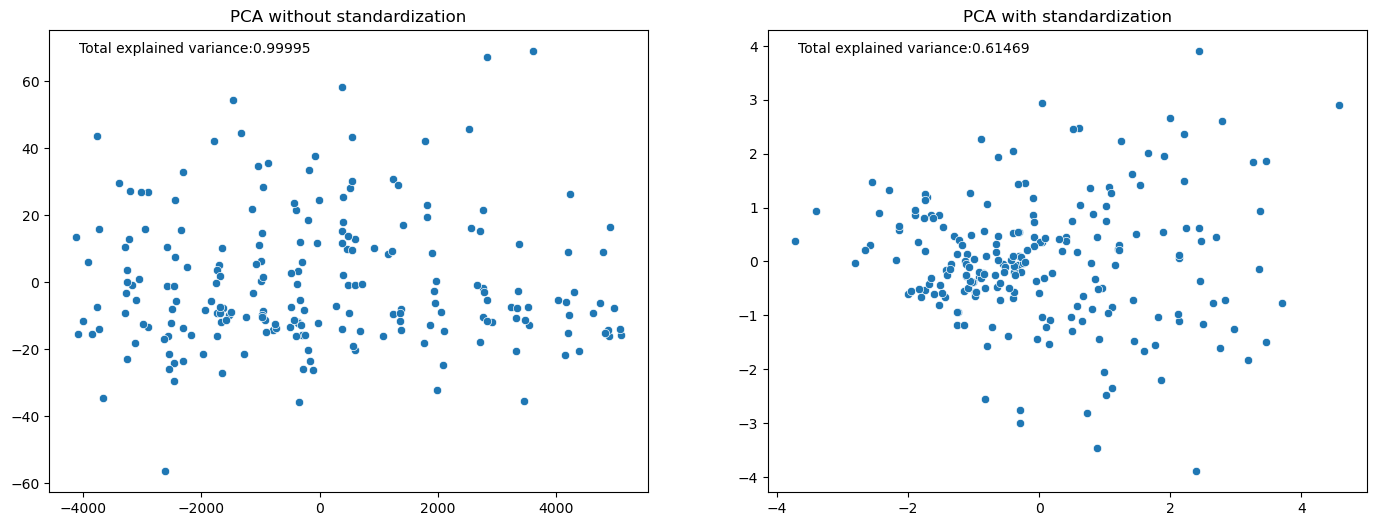

In [28]:
# Figure size increased due to more datapoints
fig, axes = plt.subplots(1,2, figsize = (17,6))

# Variance annotated with the sum of explained variance ratio on a 5 point accuracy and inserted to the upperleft corner
sns.scatterplot(x = pca_without_stan[:,0], y = pca_without_stan[:,1], ax = axes[0]).set(title="PCA without standardization")
axes[0].annotate(f'Total explained variance:{pca.explained_variance_ratio_.sum():.5f}', xy=(0.05, 0.95), xycoords='axes fraction')
sns.scatterplot(x = pca_with_stan[:,0], y = pca_with_stan[:,1], ax = axes[1]).set(title="PCA with standardization")
axes[1].annotate(f'Total explained variance:{pca_standardized.explained_variance_ratio_.sum():.5f}', xy=(0.05, 0.95), xycoords='axes fraction')



**8 c) Gather information for the next part of the exercise and print out the following things:**
- First, the standard deviation of the original data features (not standardized, and with the numeric features only).
- Second, the standard deviation of the standardized numeric features

In [29]:
# Numpy's std gives the standard deviation of its input
print(np.std(data[numeric_features]))
print(np.std(data_standardized))

age                    2423.219940
height                    7.516687
body_mass                14.577493
blood_pressure_low        9.923939
blood_pressure_high      17.467209
BMI                       5.387203
dtype: float64
age                    1.0
height                 1.0
body_mass              1.0
blood_pressure_low     1.0
blood_pressure_high    1.0
BMI                    1.0
dtype: float64


----------
**8 d) Look at the output above and the explained variance information you added as annotations to the plots. Try to think about the following questions and give a short answer of what you think has happened:**

1. Where do you think the difference between the amounts of explained variance might come from?

2. Can you say something about why it is important to scale the features for PCA by looking at the evidence you've gathered?



------------


1: The difference in explained variance between the standardized and non-standardized datasets in PCA comes from the scaling of the features. When not standardized, PCA gives more weight to features with larger variance meaning that the smaller scale features has less effect on the total variance. When standardized, the features are treated equally and therefore spread more uniformly resulting in a smaller total explained variance


2: It seems that when the features are not scaled, the smaller-scale features has less emphasis and therefore makes the set more biased towards larger scale features. Scaling in PCA is important since it gives a more accurate representation of the data's variance

------------------

## 9. t-SNE and high dimensional data 

Another method that can be used to plot high-dimensional data introduced in the lectures was t-distributed Stochastic Neighbor Embedding (t-SNE).

***9 a)*** Run t-SNE for both standardized and non standardized data (as you did with PCA).

In [33]:
# Similar lines as for PCA
tsne = TSNE(n_components=2)
tsne_standardized = TSNE(n_components=2)
tsne_without_stan = tsne.fit_transform(data[numeric_features])
tsne_with_stan = tsne_standardized.fit_transform(data_standardized)

***9 b)*** Plot t-sne, similarly to PCA making the color of the points correspond to the levels of the cardio feature, but having only numerical features as a basis of the T-SNE.  

[Text(0.5, 1.0, 't-SNE with standardization')]

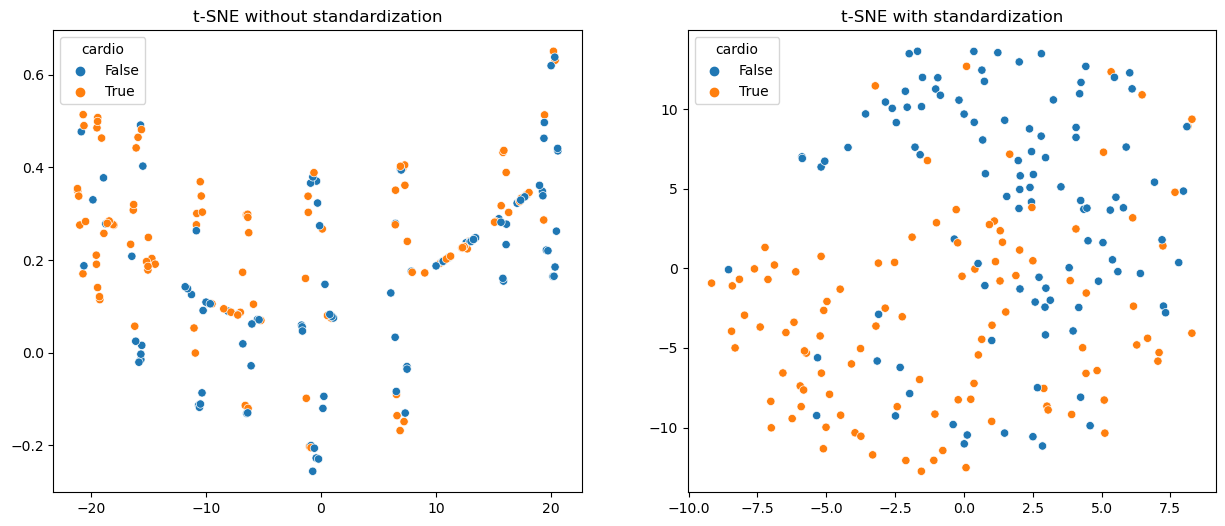

In [37]:
fig, axes = plt.subplots(1,2, figsize = (15,6))
sns.scatterplot(x = tsne_without_stan[:,0], y = tsne_without_stan[:,1], hue = data['cardio'], ax = axes[0]).set(title="t-SNE without standardization")
sns.scatterplot(x = tsne_with_stan[:,0], y = tsne_with_stan[:,1], hue = data['cardio'], ax = axes[1]).set(title="t-SNE with standardization")


***9 c)*** What do you think might have happened between the two runs of t-SNE on unstandardized and standardized data? Why is it important to standardize before using the algorithm?


Similarly to PCA, the t-SNE technique gives more weight to features with larger variance, making the plot imbalanced. Since t-SNE aims at preserving the similarities between datapoints when projected to a lower dimension, the distances and local structures get dominated and clustered by features with larger scales if not standardized